In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

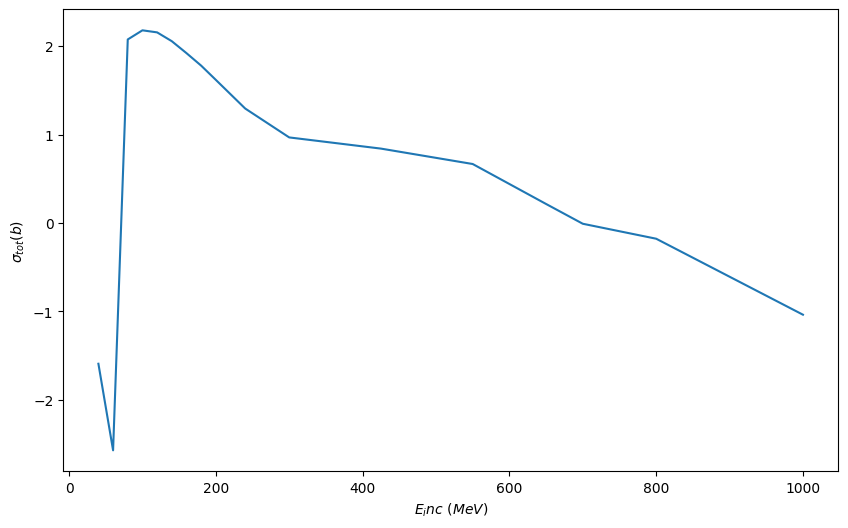

In [28]:
def den2(z,b):
  r0=0.0824
  mu=1.1926
  s=0.9604
  den=r0*np.exp(-(np.sqrt(z**2 + b**2)-mu)**2 / (2*s**2))

  return den

def const(E):
    if E == 40:
        sp, ap, sn, an = 7, 1.328, 21.8, 0.493
    elif E == 60:
        sp, ap, sn, an = 4.7, 1.626, 13.6, 0.719
    elif E == 80:
        sp, ap, sn, an = 3.69, 1.783, 9.89, 0.344
    elif E == 100:
        sp, ap, sn, an = 3.16, 1.808, 7.87, 0.293
    elif E == 120:
        sp, ap, sn, an = 2.85, 1.754, 6.63, 0.248
    elif E == 140:
        sp, ap, sn, an = 2.65, 1.644, 5.82, 0.21
    elif E == 160:
        sp, ap, sn, an = 2.52, 1.509, 5.26, 0.181
    elif E == 180:
        sp, ap, sn, an = 2.43, 1.365, 4.85, 0.154
    elif E == 200:
        sp, ap, sn, an = 2.36, 1.221, 4.54, 0.135
    elif E == 240:
        sp, ap, sn, an = 2.28, 0.944, 4.13, 0.106
    elif E == 300:
        sp, ap, sn, an = 2.42, 0.626, 3.7, 0.081
    elif E == 425:
        sp, ap, sn, an = 2.7, 0.47, 3.32, 0.0702
    elif E == 550:
        sp, ap, sn, an = 3.44, 0.32, 3.5, 0.0859
    elif E == 650:
        sp, ap, sn, an = 4.13, 0.16, 3.74, 0.112
    elif E == 700:
        sp, ap, sn, an = 4.43, 0.1, 3.77, 0.12
    elif E == 800:
        sp, ap, sn, an = 4.59, 0.06, 3.88, 0.12
    elif E == 1000:
        sp, ap, sn, an = 4.63, -0.09, 3.88, 0.151
    else:
      raise ValueError("Valor de E no soportado")
    return sn * an - sp * ap


#integro solo densidad (respecto a Z)
def integral_z(b):
  result, error = quad(den2, -np.inf, np.inf, args=(b,))
  return result


# Definimos la función a integrar respecto a b, metiendo las ctes
def integrand_b(b,E):
    I_z = integral_z(b)
    ci=const(E)
    return b * (1 - np.exp(ci*I_z))

def int_b(E):
  result, error = quad(integrand_b, 0, np.inf, args=(E,))
  return result


El=[40,60,80,100,120,140,160,180,200,240,300,425,550,650,700,800,1000]
cs=[]
for E in El:
  cs.append(int_b(E))

plt.figure(figsize=(10, 6))
plt.plot(El, cs, linestyle="solid")
#plt.title("Density of $\sigma$C")
plt.xlabel("$E_inc$ $(MeV)$")
plt.ylabel("$\\sigma_{tot}(b)$")
plt.show()

De aquí para abajo son cosas viejas

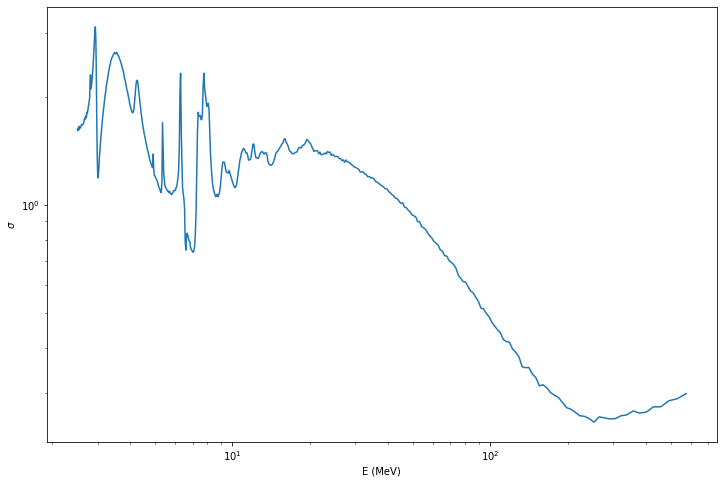

In [ ]:
#Datos de la sección eficaz total para el n-12C tomados de EXFOR nuclear data library"
column_names = ["Columna1","Columna2", "$n$-$_{}^{12}$C", "Columna4", "Columna5"]
df = pd.read_csv("data 1. C.D.Pruitt.txt", delim_whitespace=True, header=None, names= column_names)

cross_section = df["$n$-$_{}^{12}$C"]
E = df["Columna1"]

plt.figure(figsize=(12, 8))
plt.plot(E, cross_section)
plt.xlabel("E (MeV)")
plt.ylabel("$\\sigma$")
plt.title("")
plt.xscale("log")
plt.yscale("log")
plt.grid(False)
plt.show()

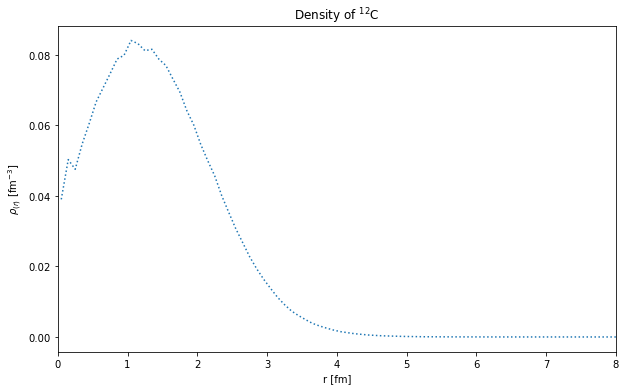

In [ ]:
densities = ["r", "$\\rho$", "error"]
df = pd.read_csv("density12C.txt", delim_whitespace=True, header=None, names= densities)

#Valores experimentales tomados de https://www.phy.anl.gov/theory/research/density/
density = df["$\\rho$"]
r = df["r"]

plt.figure(figsize = (10,6))
plt.plot(r, density, linestyle = "dotted")
plt.title("Density of $_{}^{12}$C")
plt.xlabel("r [fm]")
plt.ylabel("$\\rho_{(r)}$ [fm$^{-3}$]")
plt.xlim(0,8)
plt.show()

Densidad de C.A Bertulani pag. 432

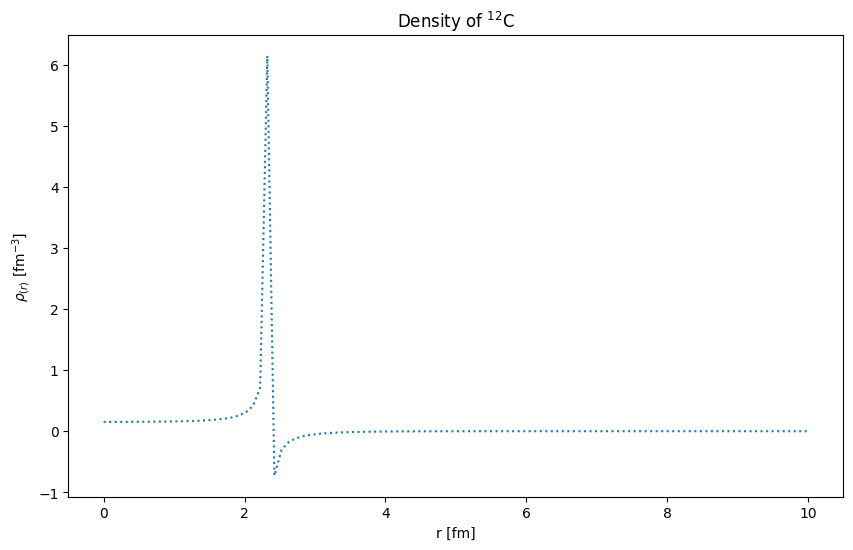

In [ ]:
#Potencial

def den(r):
  A=12
  c=2.335
  a=0.522
  d=-0.149
  R=1.3*A**(1/3)
  den0=3*A/( 4*np.pi*c**3 * (1+(np.pi**2*a**2/c**2)) )
  density = den0 * (1 + d * r ** 2 / R ** 2) / (1 - np.exp((r - c) / a))
  return density

rn=np.linspace(0,10,100)
dens=[]
for ri in rn:
  dens.append(den(ri))

plt.figure(figsize=(10, 6))
plt.plot(rn, dens, linestyle="dotted")
plt.title("Density of $_{}^{12}$C")
plt.xlabel("r [fm]")
plt.ylabel("$\\rho_{(r)}$ [fm$^{-3}$]")
plt.show()
